In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<Axes: xlabel='Class', ylabel='count'>

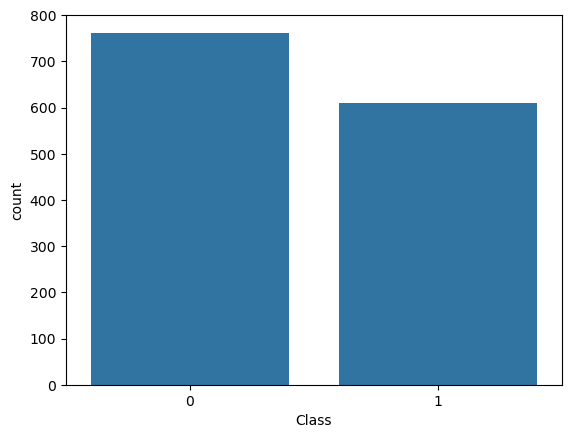

In [6]:
x = df.drop('Class', axis=1)
y = df['Class']

sns.countplot(x=y)

In [7]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

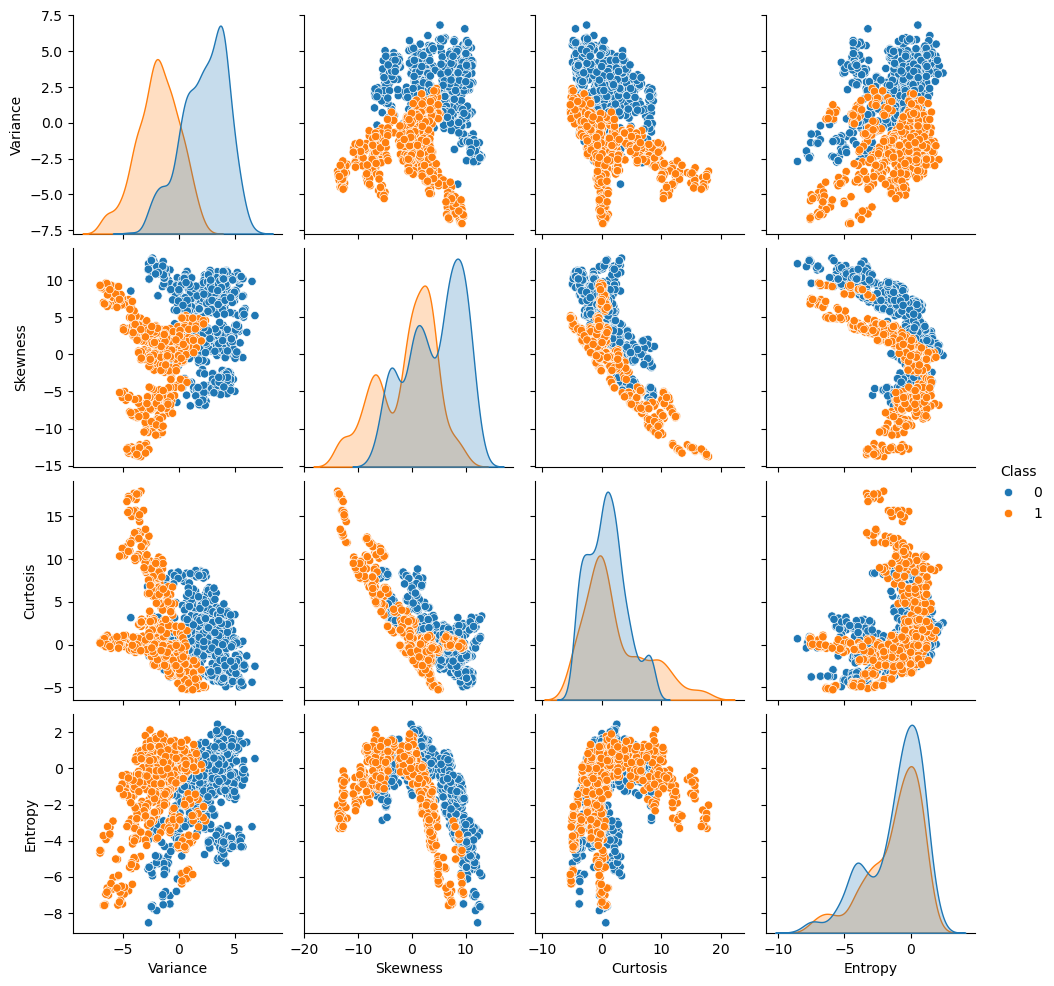

In [8]:
sns.pairplot(df, hue='Class')

In [9]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


#### NORMALISE THE DATA USING MIN MAX SCALER

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917
std,0.205003,0.219611,0.185669,0.191041
min,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821
50%,0.543617,0.602168,0.254280,0.723929
75%,0.711304,0.770363,0.364674,0.813171
max,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=25, stratify=y)

x_train.shape, x_test.shape, y_test.shape, y_train.shape

((1029, 4), (343, 4), (343,), (1029,))

### Build the model

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=25)
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate the model

In [25]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

99.70845481049562
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      0.99      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



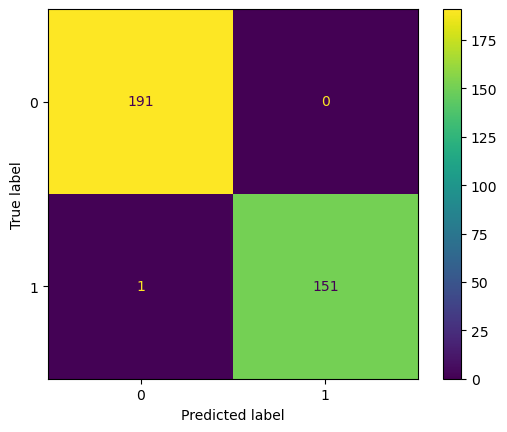

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);